# Netflix Movie Data Analysis: Genres, Popularity & Release Trends

### Questions - 
#### What is the most frequent movie genre released on Netflix? 
#### Which vote category has the most ratings?
#### Which movie has the highest popularity, and what is its genre?
#### Which movie has the lowest popularity, and what is its genre?
#### Which year had the most films released?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Movie_Data.csv')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9832                          Drama, Crime
9833                                Horror
9834             Mystery, Thriller, Horror
9835                 Music, Drama, History
9836           War, Drama, Science Fiction
Name: Genre, Length: 9837, dtype: object

In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool

In [7]:
df.duplicated().sum()

np.int64(0)

### Data Preprocessing

In [8]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [9]:
# Convert 'Release_Date' to datetime format, extract the year, and store it in 'Release_Year'
df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors = 'coerce').dt.year.astype('Int64')

df.drop(columns = ['Release_Date'], inplace = True)
df['Release_Year'].dtypes

Int64Dtype()

In [10]:
df.head()

,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [11]:
# Drop the specified columns from the dataset
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre',
       'Release_Year'],
      dtype='object')

In [12]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War",2021


In [13]:
# Function to categorize a numerical column into bins based on quartiles
def categorize_col(df, col, labels):
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    desc = df[col].describe()
    
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    df.loc[:, col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    
    return df

In [14]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Apply the categorize_col function to classify movies based on their 'Vote_Average'
df = categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_14196\266975156.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['popular', 'popular', 'below_avg', 'popular', 'average', ..., 'popular', 'not_popular', 'not_popular', 'average', 'popular']
Length: 9837
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [15]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [16]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [17]:
df.isna().sum()

Title             9
Popularity       10
Vote_Count       10
Vote_Average    111
Genre            11
Release_Year     10
dtype: int64

In [18]:
# Drop all rows that contain any missing (NaN) values in the dataset
df.dropna(inplace = True)

df.isna().sum()

Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Release_Year    0
dtype: int64

In [19]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [21]:
# Split the 'Genre' column where multiple genres are separated by commas
df['Genre'] = df['Genre'].str.split(', ')

# Explode the list values into separate rows so that each genre has its own row
df = df.explode('Genre').reset_index(drop = True)

df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


In [22]:
# Convert the 'Genre' column to a categorical data type
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25551 non-null  object  
 1   Popularity    25551 non-null  float64 
 2   Vote_Count    25551 non-null  object  
 3   Vote_Average  25551 non-null  category
 4   Genre         25551 non-null  category
 5   Release_Year  25551 non-null  Int64   
dtypes: Int64(1), category(2), float64(1), object(2)
memory usage: 874.3+ KB


In [24]:
df.nunique()

Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
Release_Year     100
dtype: int64

In [25]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


### Data Visualization

In [26]:
sns.set_style('whitegrid')

In [27]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

#### What is the most frequent movie genre released on Netflix? 

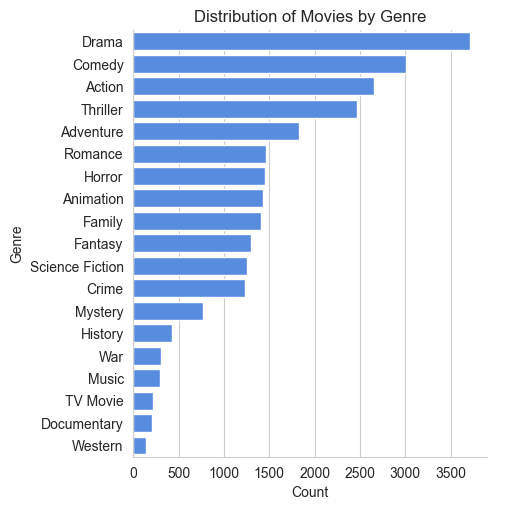

In [28]:
# Create a categorical plot to visualize the distribution of movies by genre
sns.catplot(
    y = 'Genre',                              # Set the y-axis to the 'Genre' column
    data = df,                                # Use the processed dataframe
    kind = 'count',                           # Plot type: count plot (Bar Chart)
    order = df['Genre'].value_counts().index, # Order genres by their frequency
    color = '#4287f5'                         # Set bar color to blue
)

# Add a title to the plot
plt.title('Distribution of Movies by Genre')

# Label the x-axis
plt.xlabel('Count')

plt.show()

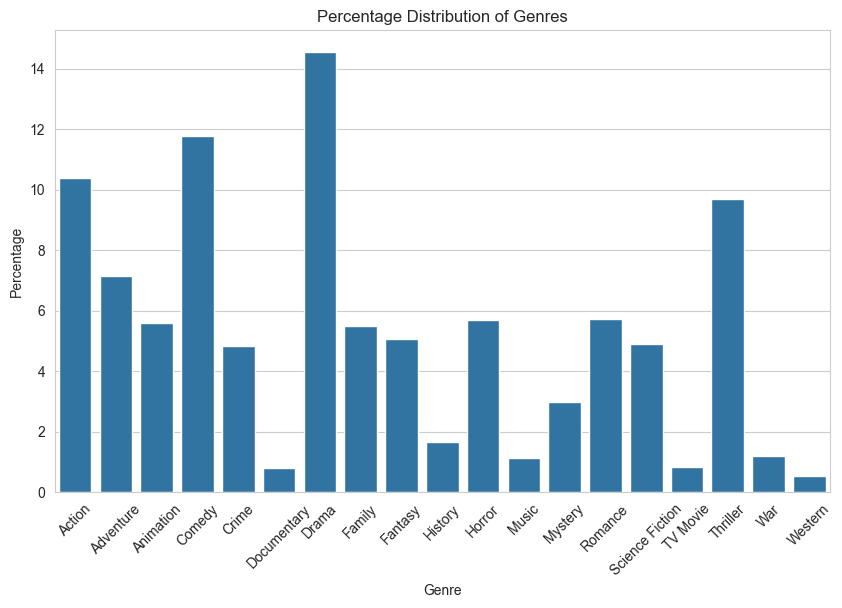

In [29]:
# Count the number of movies for each genre
genre_counts = df['Genre'].value_counts()

# Calculate the total number of movies in the dataset
total_movies = len(df)

# Compute the percentage distribution of each genre
percentage_distribution = (genre_counts / total_movies) * 100

# Set the figure size for better visibility
plt.figure(figsize = (10, 6))

# Create a bar plot to visualize the percentage distribution of genres
sns.barplot(x = percentage_distribution.index, y = percentage_distribution.values)

plt.title('Percentage Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45)

plt.show()

In [30]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


#### Which vote category has the most ratings?

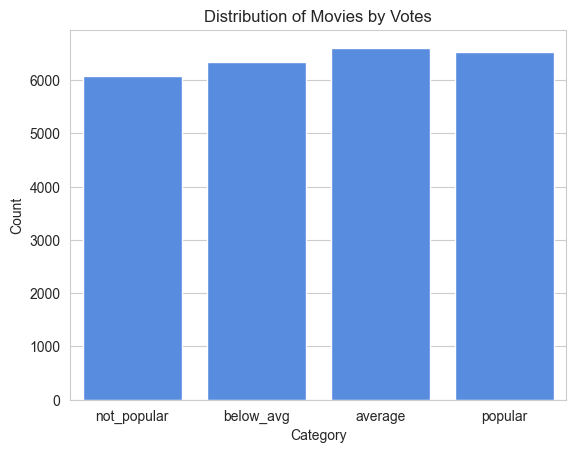

In [31]:
# Create a bar plot to visualize the distribution of movies based on vote categories
sns.barplot(
    x = df['Vote_Average'].value_counts().index,  # Set x-axis to unique vote categories
    y = df['Vote_Average'].value_counts().values, # Set y-axis to the count of each category
    color = '#4287f5'                             # Set bar color to blue
)

plt.title('Distribution of Movies by Votes')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

In [32]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


#### Which movie has the highest popularity, and what is its genre?

In [33]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


#### Which movie has the lowest popularity, and what is its genre?

In [34]:
df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25545,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25546,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25547,The United States vs. Billie Holiday,13.354,152,average,History,2021
25548,Threads,13.354,186,popular,War,1984
25549,Threads,13.354,186,popular,Drama,1984
25550,Threads,13.354,186,popular,Science Fiction,1984


In [35]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


#### Which year had the most films released?

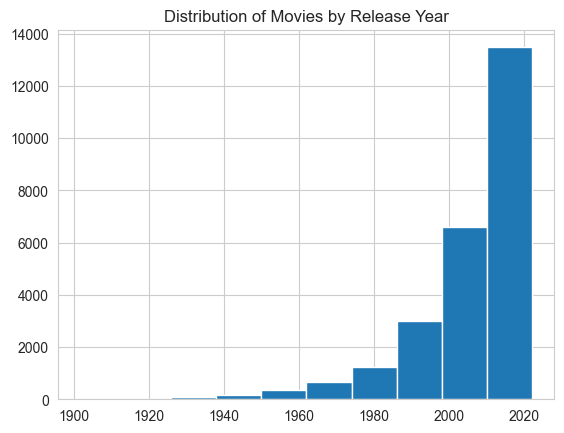

In [37]:
# Create a histogram to visualize the distribution of movies by release year
df['Release_Year'].hist()

plt.title('Distribution of Movies by Release Year')

plt.show()

### Conclusion - 
#### __*Drama*__ is the most popular genre, making up over __*14%*__ of the movies, more than any of the other 18 genres
#### Most of the movies are rated as __*average*__
#### __*Spider-Man: No Way Home*__ (Action, Adventure, Science Fiction) has the highest popularity
#### __*The United States vs. Billie Holiday*__ (Music, Drama, History) and __*Threads*__ (War, Drama, Science Fiction) have the lowest popularity
#### The majority of movies were released during the period from __*2010 to 2020*__